In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cancer patient data sets.csv")

In [3]:
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.drop(["Patient Id" , "index"], axis = 1 , inplace = True)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
data.replace(to_replace = "Low" , value = 0 , inplace = True)
data.replace(to_replace = "Medium" , value = 1 , inplace = True)
data.replace(to_replace = "High" , value = 1 , inplace = True)

In [7]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,1
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,1
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1


In [8]:
positive_count = data[data['Level'] == 1].shape[0]
negative_count = data[data['Level'] == 0].shape[0]
ratio = positive_count / negative_count
print("Positive examples:", positive_count)
print("Negative examples:", negative_count)
print("Positive ratio:", positive_count/(positive_count+negative_count))
print("Negative ratio:", negative_count/(positive_count+negative_count))

Positive examples: 697
Negative examples: 303
Positive ratio: 0.697
Negative ratio: 0.303


In [9]:
train,test=train_test_split(data,test_size=0.3,stratify=data['Level'])
positive_count = train[train['Level'] == 1].shape[0]
negative_count = train[train['Level'] == 0].shape[0]
ratio = positive_count / negative_count
print("Positive examples:", positive_count)
print("Negative examples:", negative_count)
print("Positive ratio:", positive_count/(positive_count+negative_count))
print("Negative ratio:", negative_count/(positive_count+negative_count))
train_set,test_set=train_test_split(data,test_size=0.3)
positive_count = test[test['Level'] == 1].shape[0]
negative_count = test[test['Level'] == 0].shape[0]
ratio = positive_count / negative_count
print("Positive examples:", positive_count)
print("Negative examples:", negative_count)
print("Positive ratio:", positive_count/(positive_count+negative_count))
print("Negative ratio:", negative_count/(positive_count+negative_count))

Positive examples: 488
Negative examples: 212
Positive ratio: 0.6971428571428572
Negative ratio: 0.3028571428571429
Positive examples: 209
Negative examples: 91
Positive ratio: 0.6966666666666667
Negative ratio: 0.30333333333333334


In [10]:
x_train=train_set.drop('Level',axis=1)
y_train=train_set['Level']
x_test=test_set.drop('Level',axis=1)
y_test=test_set['Level']
model= RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [11]:
#Confusion Matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
TP,FN,FP,TN = matrix.reshape(-1)
print('Values of TP,FN,FP,TN : ', TP,FN,FP,TN)

Values of TP,FN,FP,TN :  213 0 0 87


In [12]:
#Accuracy
acc_func = accuracy_score(y_test, y_pred)
print('Accuracy from function: ', acc_func)
acc_form = (TP+TN)/(TP+FN+FP+TN)
print('Accuracy from formula: ', acc_form)

Accuracy from function:  1.0
Accuracy from formula:  1.0


In [13]:
#Precision
prec_func = precision_score(y_test, y_pred)
print('Precision from function: ', prec_func)
prec_form = TP/(TP+FP)
print('Precision from formula: ', prec_form)

Precision from function:  1.0
Precision from formula:  1.0


In [14]:
#Recall
rec_func = recall_score(y_test, y_pred)
print('Recall from function: ', rec_func)
rec_form = TP/(TP+FN)
print('Recall from formula: ', rec_form)

Recall from function:  1.0
Recall from formula:  1.0


In [15]:
#Specity
specity_formula = TN/(FP+TN)
print('Specificity from Formula: ', specity_formula)

Specificity from Formula:  1.0


In [16]:
#F1 Score
f1_func = f1_score(y_test, y_pred)
print('F1-score from function: ', f1_func)
f1_form = (2*prec_form*rec_form)/(prec_form+rec_form)
print('F1-score from formula: ', f1_form)

F1-score from function:  1.0
F1-score from formula:  1.0


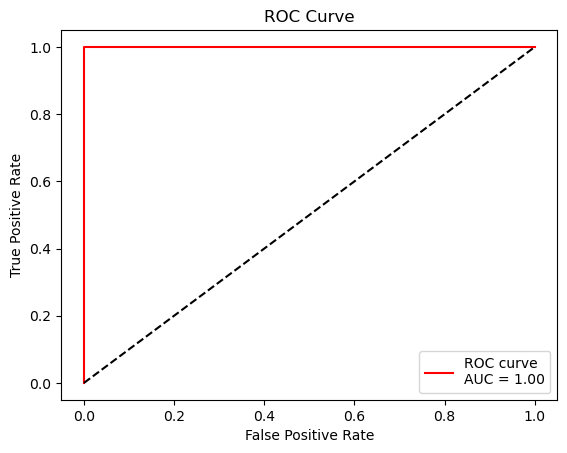

In [17]:
fpr, tpr, th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label='ROC curve \nAUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Importance Features')

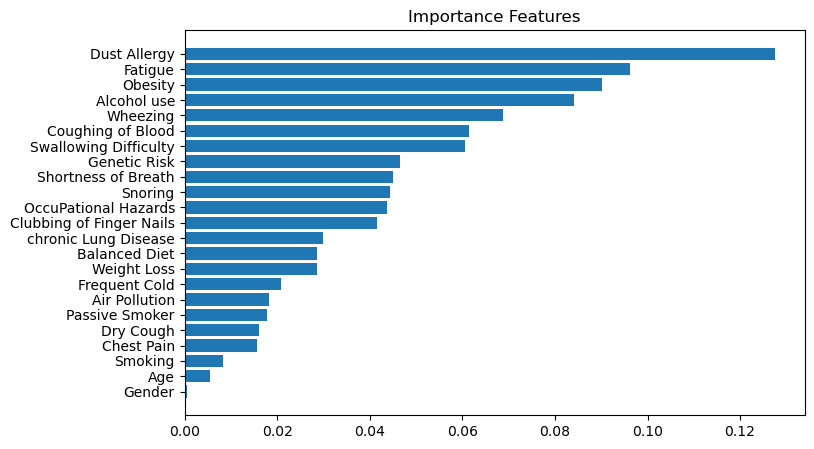

In [18]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x_train.columns[indices])
plt.title("Importance Features")